In [1]:
MyText <- readLines("/Users/gawain/Desktop/3.UBC/Block3/Data-581 - Modelling/Labs/Lab3/text.txt")
head(MyText)

[1] "The idea of bootstrapping is to replace the population by the given "     
[2] "sample Then resamples are taken from this population For each resample a "
[3] "sample mean can be computed The bootstrap standard error estimate is the "
[4] "standard deviation of this collection of sample means For this problem "  
[5] "we can calculate an explicit formula for this bootstrap standard error "  
[6] "It should be emphasized that this discussion has centered on a "

In [3]:
# 2.1  separates strings at spaces, resulting in lists of single words
MyTextStrings <- strsplit(MyText, " ")
head(MyTextStrings)

[[1]]
 [1] "The"           "idea"          "of"            "bootstrapping"
 [5] "is"            "to"            "replace"       "the"          
 [9] "population"    "by"            "the"           "given"        

[[2]]
 [1] "sample"     "Then"       "resamples"  "are"        "taken"     
 [6] "from"       "this"       "population" "For"        "each"      
[11] "resample"   "a"         

[[3]]
 [1] "sample"    "mean"      "can"       "be"        "computed"  "The"      
 [7] "bootstrap" "standard"  "error"     "estimate"  "is"        "the"      

[[4]]
 [1] "standard"   "deviation"  "of"         "this"       "collection"
 [6] "of"         "sample"     "means"      "For"        "this"      
[11] "problem"   

[[5]]
 [1] "we"        "can"       "calculate" "an"        "explicit"  "formula"  
 [7] "for"       "this"      "bootstrap" "standard"  "error"    

[[6]]
 [1] "It"         "should"     "be"         "emphasized" "that"      
 [6] "this"       "discussion" "has"        "centered"   "on"        
[11] "a"

In [5]:
# 2.2 use the unlist() function to remove the list structure, resulting in a plain vector of strings (none of which contain blank spaces
MyTextStrings <- unlist(MyTextStrings)
MyTextStrings[1:10]

[1] "The"           "idea"          "of"            "bootstrapping"
 [5] "is"            "to"            "replace"       "the"          
 [9] "population"    "by"

In [7]:
# 2.3 Markov chain analysis of the text strings
# count the number characters in each string using the nchar() function
lettercounts <- nchar(MyTextStrings)
lettercounts[1:12]

[1]  3  4  2 13  2  2  7  3 10  2  3  5

In [10]:
# 3. remove the remaining blank spaces:
lettercounts <- lettercounts[lettercounts > 0]
lettercounts[1:12]

[1]  3  4  2 13  2  2  7  3 10  2  3  5

In [12]:
# 4. use the following truncation to reduce the size of the state space
lettercountsT <- lettercounts
lettercountsT[lettercounts > 11] <- 12
# We only need to estimate 144 elements of our transition matrix instead of 196, 
#      so we gain some accuracy by giving up this degree of precision

In [13]:
# 5. Construct the transition matrix
P <- matrix(0, nrow=12, ncol=12)
for (i in 2:length(lettercountsT)) {
      P[lettercountsT[i-1], lettercountsT[i]] <- P[lettercountsT[i-1],lettercountsT[i]] + 1
}
P <- P/as.numeric(table(lettercountsT[-length(lettercountsT)]))
length(table(lettercountsT[-length(lettercountsT)]))
P

[1] 12

0.00000000,0.00000000,0.04166667,0.12500000,0.12500000,0.25000000,0.00000000,0.16666667,0.16666667,0.04166667,0.08333333,0.000000000
0.06164384,0.08219178,0.21917808,0.13698630,0.09589041,0.09589041,0.07534247,0.04794521,0.04109589,0.05479452,0.04794521,0.041095890
0.02013423,0.12080537,0.11409396,0.15436242,0.10738255,0.06040268,0.08053691,0.12080537,0.08724832,0.04026846,0.05369128,0.040268456
0.04273504,0.14529915,0.27350427,0.13675214,0.02564103,0.06837607,0.10256410,0.05128205,0.02564103,0.05982906,0.05982906,0.008547009
0.02631579,0.18421053,0.30263158,0.13157895,0.09210526,0.10526316,0.09210526,0.02631579,0.01315789,0.00000000,0.01315789,0.013157895
0.01492537,0.23880597,0.14925373,0.14925373,0.07462687,0.08955224,0.04477612,0.07462687,0.08955224,0.01492537,0.01492537,0.044776119
0.01724138,0.39655172,0.13793103,0.17241379,0.12068966,0.01724138,0.06896552,0.03448276,0.01724138,0.01724138,0.00000000,0.000000000
0.03278689,0.22950820,0.13114754,0.06557377,0.21311475,0.06557377,0.08196721,0.06557377,0.01639344,0.01639344,0.03278689,0.049180328
0.02222222,0.28888889,0.11111111,0.15555556,0.04444444,0.02222222,0.00000000,0.15555556,0.06666667,0.06666667,0.02222222,0.044444444
0.00000000,0.20689655,0.24137931,0.17241379,0.00000000,0.13793103,0.13793103,0.00000000,0.10344828,0.00000000,0.00000000,0.000000000
0.00000000,0.12500000,0.12500000,0.21875000,0.18750000,0.18750000,0.00000000,0.00000000,0.03125000,0.00000000,0.09375000,0.031250000


In [16]:
# 6. Find the mean and standard deviation of the word lengths in the original data set 
#     as well as the proportion of the time that the difference in subsequent word lengths exceeds 7

miu <- mean(lettercounts)           # the mean of the word lengths in the original dataset
v_val <- var(lettercounts)          # the variance of the word lengths in the original dataset
pro_diff_over_7 <- mean(diff(lettercountsT) > 7)
cat("The original mean:", miu)
cat("\nThe original var:", v_val)
cat("\nThe proportion of the time that the diff in subsequent word length exceeds 7:", pro_diff_over_7)

The original mean: 5.134058
The original var: 8.79821
The proportion of the time that the diff in subsequent word length exceeds 7: 0.05199516

In [17]:
# 7. To check another text to see if its authorship would be different from the given text
wordlengthAVGs <- numeric(1000)
wordlengthSDs <- numeric(1000)
diff9 <- numeric(1000)

for (i in 1:1000) {
      Ntransitions <- length(lettercounts) # number of words
      wordlength <- numeric(Ntransitions)#initializing the Markov chain
      current.state <- lettercountsT[1] # initial wordlength
      for (j in 1:Ntransitions) {
            current.state <- sample(1:12,
            size = 1, prob = P[current.state, ])
            wordlength[j] <- current.state
      }
      wordlengthAVGs[i] <- mean(wordlength)
      wordlengthSDs[i] <- sd(wordlength)
      diff9[i] <- mean(abs(diff(wordlength)) > 9)
}

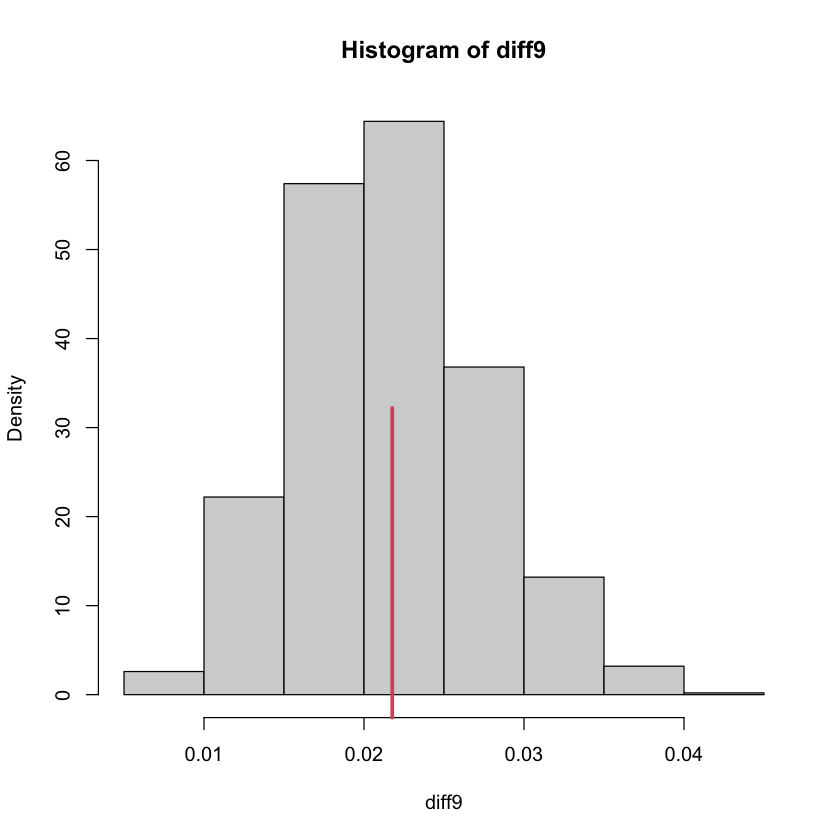

In [18]:
# we have calculated the mean and standard deviation of the wordlength
# and the proportion of time the absolute value of the subsequent difference in wordlength changes by more than 9 characters
# plot histgram and rug plot indicating the location of the observed data
hist(diff9, freq=FALSE)
rug(mean(abs(diff(lettercountsT)) > 9), col=2, lwd=3, ticksize=.5)

-  The red line is an indicator that our model is fitting well.
-  we would be suspicious of any text where the extreme statistic was larger than .04 or less than .01

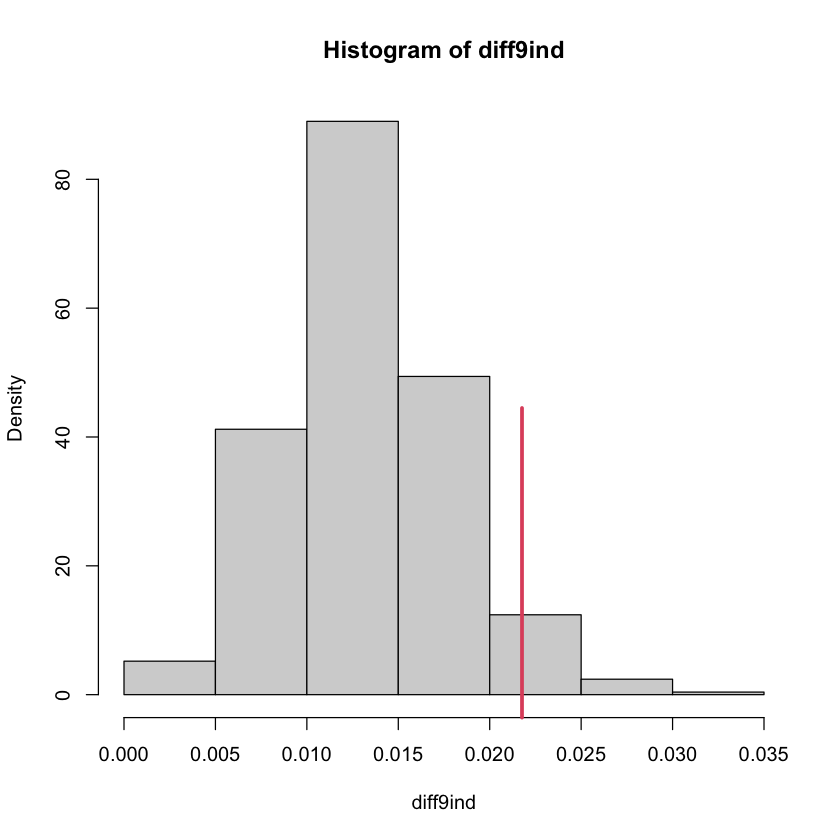

In [19]:
#  What if we just sample from the marginal distribution of the observed states?
# assuming that the changes in wordlength are independent from word to word

diff9ind <- numeric(1000)
for (i in 1:1000) {
      indepcounts <- sample(1:12, size=length(lettercounts),
      replace=TRUE, prob=table(lettercountsT)/
      length(lettercounts))
      diff9ind[i] <- mean(abs(diff(indepcounts)) > 9)
}

hist(diff9ind, freq=FALSE)
rug(mean(abs(diff(lettercountsT)) > 9), col=2, lwd=3, ticksize=.5)

- observed value of the extreme statistic is no longer in an area of high probability density
- We would judge the actual author as a forger
- We would also fail to detect forgery in a work where the extreme statistic is less than .01 – a further indication of inaccuracy

## Q9

Repeat the above graphical analyses in the cases of the mean and the standard deviation.

What rule would you use to identify a forgery on the basis of the mean wordlength? 

How about on the basis of the standard deviation of the wordlength?

### mean

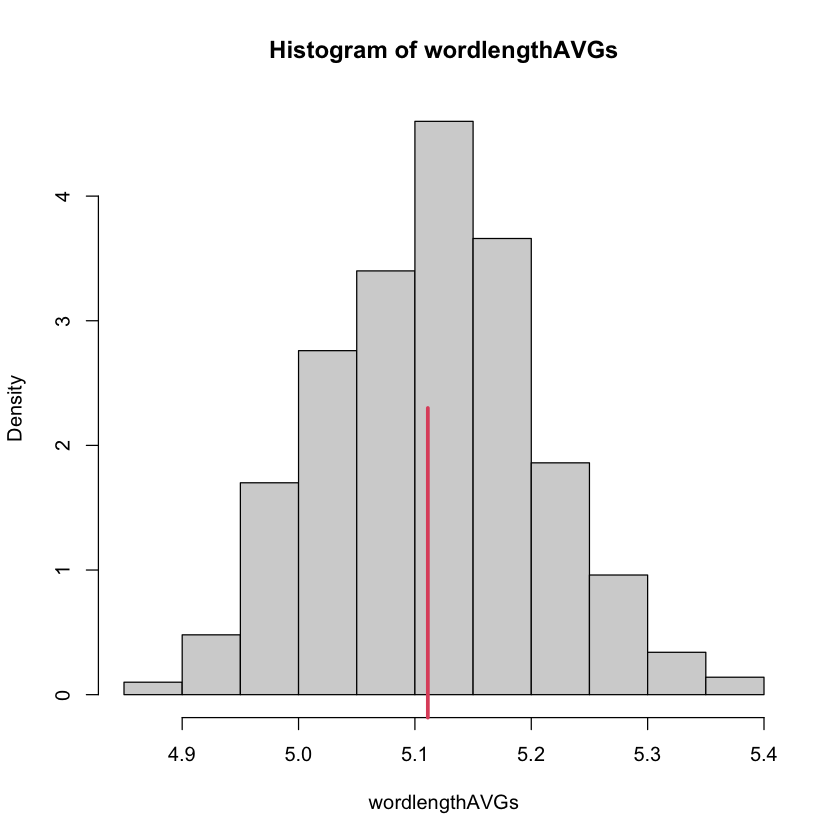

In [26]:
wordlengthAVGs <- numeric(1000)
wordlengthSDs <- numeric(1000)

# mean9 <- numeric(1000)

for (i in 1:1000) {
      Ntransitions <- length(lettercounts) # number of words
      wordlength <- numeric(Ntransitions)#initializing the Markov chain
      current.state <- lettercountsT[1] # initial wordlength
      for (j in 1:Ntransitions) {
            current.state <- sample(1:12,
            size = 1, prob = P[current.state, ])
            wordlength[j] <- current.state
      }
      wordlengthAVGs[i] <- mean(wordlength)
      wordlengthSDs[i] <- sd(wordlength)
      # mean9[i] <- mean(wordlength > 9) # change diff into mean
}
hist(wordlengthAVGs, freq=FALSE)
rug(mean(lettercountsT), col=2, lwd=3, ticksize=.5)

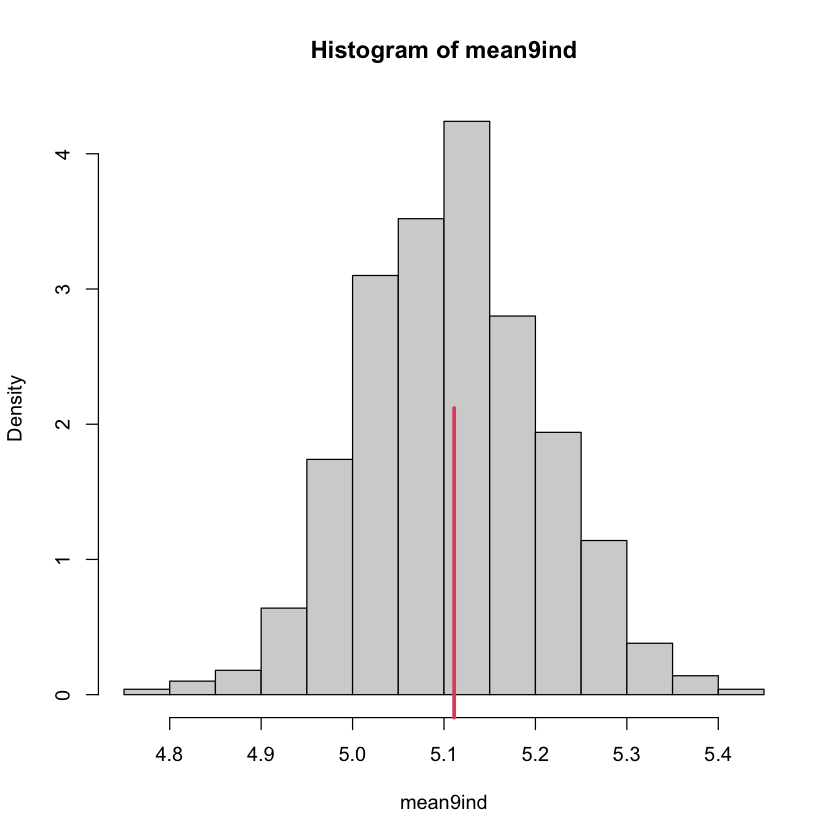

In [27]:
mean9ind <- numeric(1000)
for (i in 1:1000) {
      indepcounts <- sample(1:12, size=length(lettercounts),
      replace=TRUE, prob=table(lettercountsT)/
      length(lettercounts))
      mean9ind[i] <- mean(indepcounts)
      # mean9ind[i] <- mean(indepcounts > 9)

}

hist(mean9ind, freq=FALSE)
rug(mean(lettercountsT), col=2, lwd=3, ticksize=.5)

### SD

In [25]:
sd(wordlength)

[1] 2.941831

In [ ]:
wordlengthVars <- numeric(1000)
wordlengthSDs <- numeric(1000)

sd9 <- numeric(1000)

for (i in 1:1000) {
      Ntransitions <- length(lettercounts) # number of words
      wordlength <- numeric(Ntransitions)#initializing the Markov chain
      current.state <- lettercountsT[1] # initial wordlength
      for (j in 1:Ntransitions) {
            current.state <- sample(1:12,
            size = 1, prob = P[current.state, ])
            wordlength[j] <- current.state
      }
      wordlengthVars[i] <- var(wordlength)
      wordlengthSDs[i] <- sd(wordlength)
      sd9[i] <- sd(wordlength > 9) # change diff into sd
}
hist(sd9, freq=FALSE)
rug(sd(lettercountsT > 9), col=2, lwd=3, ticksize=.5)